In [1]:
#경고 끄기
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='Malgun Gothic')

### 단량별 가격 sbidpric
- 거래단량 delngprut이 얼마에 거래됬는지 나타내는 변수
- sbidpric만으로는 g, kg, ton 단위가 너무 포괄적이기 때문에 kg당 가격으로 가공 필요

#### 컬럼추가
- Kg당 가격(priceperkg)
  - 가격(sbidpric) / 거래단량(delngprut)
  - 거래단위(stdunitnewcode)가 g(11)일경우 *1000, kg(12)일경우 그대로, ton(13)일경우 /1000
  - 하면 priceperkg가 됨
- 총거래가격(totalprice)
  - 거래량(delngQy) * 가격(sbidpric)
- 총량(totalweight)
  - 거래단량(delngprut) * 거래량(delngQy)
  - 거래단위(stdunitnewcode)가 g(11)일경우 /1000, kg(12)일경우 그대로, ton(13)일경우 *1000

### 경매 종류 선택 aucsecode-숫자 aucsenm-한글

- 1: 경매

- 2: 정가수의

  - 경쟁계약에 의하지 않고 임의로 상대를 선정하여 계약을 체결하는 것

- 3: 자기계산

  - 가격을 정하고 거래(정가매매)
      1. 출하자 가격과 수량 정해서 도매법인에게 의견전달
      2. 도매법인이 여러 구매자(중도매인, 매매참가인)에게 알려줌
      3. 구매 의향 있는 구매자 등장 시 거래성사

- 4: 매수도매

  - 직접 생산자와 출하약정을 맺고 물량을 구입해 중도매인에게 적정 가격으로 공급하는 제도

In [3]:
def getData():
    df2008 = pd.read_csv("C:/농수산가격데이터/1001배추/2008010120081231.csv")
    df2009 = pd.read_csv("C:/농수산가격데이터/1001배추/2009010120091231.csv")
    df2010 = pd.read_csv("C:/농수산가격데이터/1001배추/2010010120101231.csv")
    df2011 = pd.read_csv("C:/농수산가격데이터/1001배추/2011010120111231.csv")
    df2012 = pd.read_csv("C:/농수산가격데이터/1001배추/2012010120121231.csv")
    df2013 = pd.read_csv("C:/농수산가격데이터/1001배추/2013010120131231.csv")
    df2014 = pd.read_csv("C:/농수산가격데이터/1001배추/2014010120141231.csv")
    df2015 = pd.read_csv("C:/농수산가격데이터/1001배추/2015010120151231.csv")
    df2016 = pd.read_csv("C:/농수산가격데이터/1001배추/2016010120161231.csv")
    df2017 = pd.read_csv("C:/농수산가격데이터/1001배추/2017010120171231.csv")
    df2018 = pd.read_csv("C:/농수산가격데이터/1001배추/2018010120181231.csv")
    return pd.concat((df2008, df2009, df2010, df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018), axis=0)

In [4]:
def priceTransform(df):
    #Kg당 가격(priceperkg)
    #총거래가격(totalprice) = 거래량(delngQy) * 가격(sbidpric)
    #총량(totalweight) = 거래단량(delngprut) * 거래량(delngQy) * 단위

    df11 = df[(df['stdunitnewcode']==11)]
    df12 = df[(df['stdunitnewcode']==12)]
    df13 = df[(df['stdunitnewcode']==13)]
    df11['priceperkg'] = df11['sbidpric'] / df11['delngprut'] * 1000
    df11['totalweight'] = df11['delngprut'] * df11['delngqy'] / 1000
    df12['priceperkg'] = df12['sbidpric'] / df12['delngprut']
    df12['totalweight'] = df12['delngprut'] * df12['delngqy']
    df13['priceperkg'] = df13['sbidpric'] / df13['delngprut'] / 1000
    df13['totalweight'] = df13['delngprut'] * df13['delngqy'] / 1000
    
    df = pd.concat([df11, df12, df13])

    df['totalprice'] = df['sbidpric'] * df['delngqy']
        
    return df

In [5]:
df = getData()

In [6]:
df = priceTransform(df)

In [56]:
df = df[df['priceperkg'] > 0]

In [71]:
# 정렬
df = df.sort_values(["delngde"], ascending=[True])

In [66]:
df['yyyy'] = df['delngde'].apply(lambda x: str(x)[0:4])
df['mm'] = df['delngde'].apply(lambda x: str(x)[4:6])

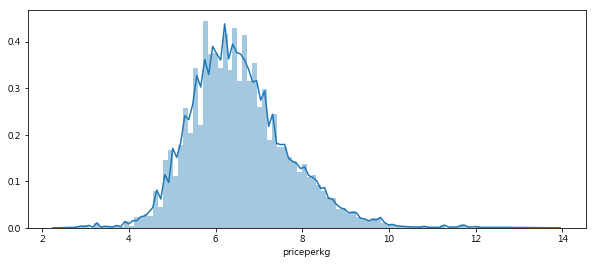

In [58]:
# 로그스케일링 histogram
f, ax = plt.subplots(figsize=(10, 4))
sns.distplot(np.log1p(df['priceperkg']), bins=100)

In [61]:
np.exp(3)

20.085536923187668

In [78]:
df.columns

Index(['aucsecode', 'aucsenm', 'catgorycode', 'catgorynewcode', 'catgorynewnm',
       'catgorynm', 'cprinsttcode', 'cprinsttnewcode', 'cprmtccode',
       'cpruseprdlstcode', 'cpruseprdlstnm', 'delngde', 'delngprut', 'delngqy',
       'insttnewnm', 'insttnm', 'ledgno', 'rnum', 'sbidpric', 'shipmntsecode',
       'shipmntsenm', 'sleseqn', 'stdfrmlcnewcode', 'stdfrmlcnewnm',
       'stdmgnewcode', 'stdmgnewnm', 'stdmtcnewcode', 'stdmtcnewnm',
       'stdprdlstcode', 'stdprdlstnewcode', 'stdprdlstnewnm', 'stdprdlstnm',
       'stdqlitynewcode', 'stdqlitynewnm', 'stdspciescode', 'stdspciesnewcode',
       'stdspciesnewnm', 'stdspciesnm', 'stdunitnewcode', 'stdunitnewnm',
       'whsalmrktcode', 'whsalmrktnewcode', 'whsalmrktnewnm', 'whsalmrktnm',
       'priceperkg', 'totalweight', 'totalprice', 'yyyy', 'mm'],
      dtype='object')

In [137]:
df[['aucsecode','aucsenm']].drop_duplicates()

,aucsecode,aucsenm
0,1,경매
16543,3,자기계산
17059,2,정가수의
159465,5,NaN
111783,4,매수도매


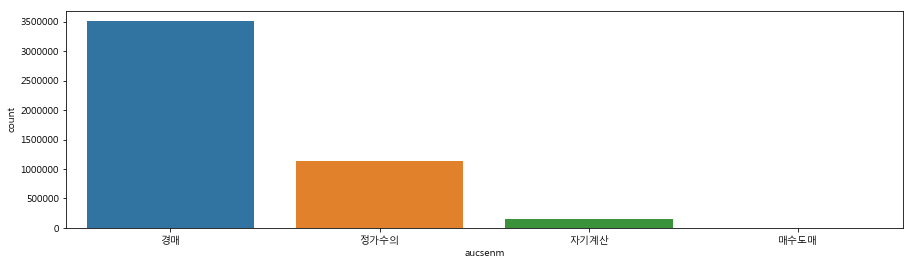

In [7]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(df['aucsenm'])

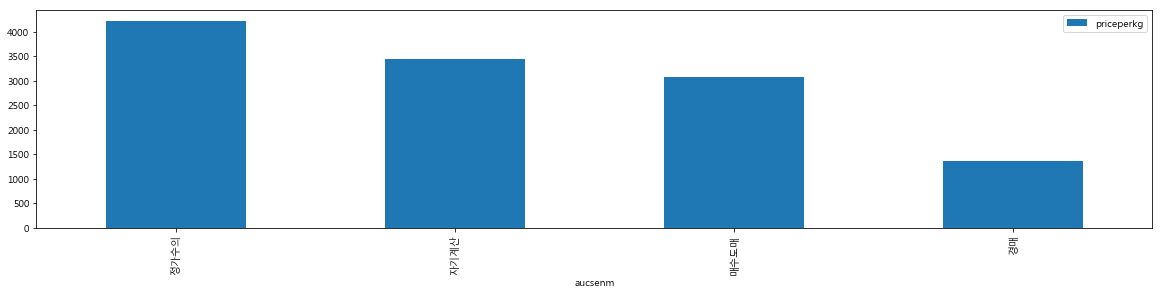

In [8]:
f, ax = plt.subplots(figsize=(20, 4))
df[['aucsenm','priceperkg']].groupby("aucsenm").mean().sort_values(by='priceperkg', ascending=False).plot.bar(ax=ax)

In [9]:
pd.DataFrame(df[['aucsenm','totalprice']].groupby("aucsenm").sum().sort_values(by='totalprice', ascending=False)['totalprice'].apply(lambda x: format(int(x), ',')))

,totalprice
aucsenm,
경매,"2,071,609,756,417"
정가수의,"637,551,731,829"
자기계산,"276,816,941,781"
매수도매,"4,058,375,475"


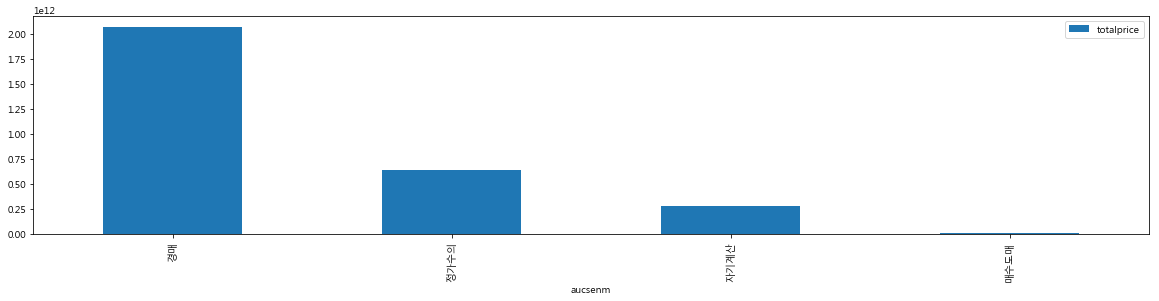

In [10]:
f, ax = plt.subplots(figsize=(20, 4))
df[['aucsenm','totalprice']].groupby("aucsenm").sum().sort_values(by='totalprice', ascending=False).plot.bar(ax=ax)

In [11]:
pd.DataFrame(df[['aucsenm','totalweight']].groupby("aucsenm").sum().sort_values(by='totalweight', ascending=False)['totalweight'].apply(lambda x: format(int(x), ',')))


,totalweight
aucsenm,
경매,"4,119,879,607"
정가수의,"823,871,565"
자기계산,"142,311,353"
매수도매,"7,377,151"


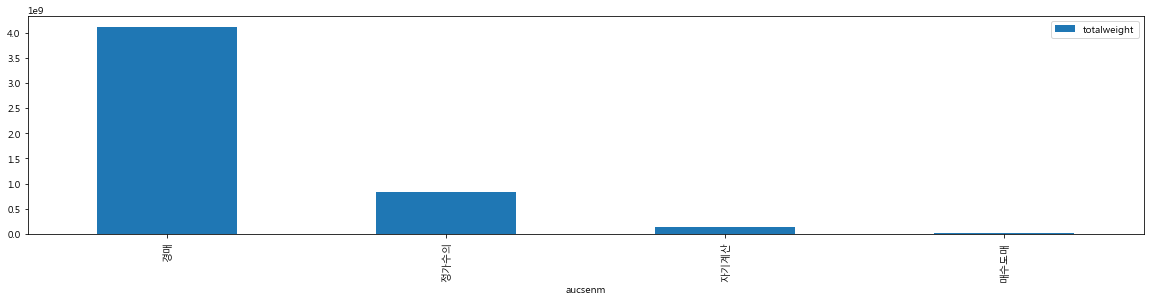

In [12]:
f, ax = plt.subplots(figsize=(20, 4))
df[['aucsenm','totalweight']].groupby("aucsenm").sum().sort_values(by='totalweight', ascending=False).plot.bar(ax=ax)

### 경락일자 delngde
### 거래단량 delngprut
### 거래량 delngqy

### 등급코드 stdqlitynewcode / stdqlitynewnm

In [234]:
df[['stdqlitynewcode','stdqlitynewnm']].drop_duplicates()

,stdqlitynewcode,stdqlitynewnm
0,11,특
17211,1Z,무등급
17197,12,상
16543,13,보통
16609,14,4등
17084,00,NaN
17597,19,등외
17731,15,5등
24563,18,8등
11655,17,7등


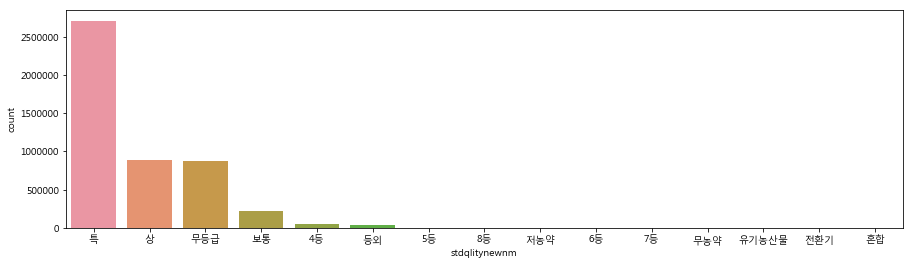

In [13]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(df['stdqlitynewnm'],order = df['stdqlitynewnm'].value_counts().index)

#### 그룹별 중위수 및 평균

In [14]:
pd.concat([
      df[(df['stdqlitynewnm'] == '특') | (df['stdqlitynewnm'] == '무등급') | (df['stdqlitynewnm'] == '상') | (df['stdqlitynewnm'] == '보통')][['stdqlitynewnm','priceperkg']].groupby("stdqlitynewnm").median()
    , df[(df['stdqlitynewnm'] == '특') | (df['stdqlitynewnm'] == '무등급') | (df['stdqlitynewnm'] == '상') | (df['stdqlitynewnm'] == '보통')][['stdqlitynewnm','totalweight']].groupby("stdqlitynewnm").median()
    , df[(df['stdqlitynewnm'] == '특') | (df['stdqlitynewnm'] == '무등급') | (df['stdqlitynewnm'] == '상') | (df['stdqlitynewnm'] == '보통')][['stdqlitynewnm','priceperkg']].groupby("stdqlitynewnm").mean()
    , df[(df['stdqlitynewnm'] == '특') | (df['stdqlitynewnm'] == '무등급') | (df['stdqlitynewnm'] == '상') | (df['stdqlitynewnm'] == '보통')][['stdqlitynewnm','totalweight']].groupby("stdqlitynewnm").mean()
] , axis=1)

,priceperkg,totalweight,priceperkg,totalweight
stdqlitynewnm,,,,
무등급,550.00,460.0,3089.233553,895.921030
보통,418.75,300.0,615.271284,930.655776
상,450.00,400.0,747.016447,952.415122
특,800.00,260.0,2427.772885,1135.761777


In [112]:
aa = pd.DataFrame(df[(df['aucsecode']==1) & (df['stdqlitynewnm'] == '특') | (df['stdqlitynewnm'] == '상')]
                       [['yyyy','mm','stdqlitynewnm','priceperkg','totalprice']].groupby(['yyyy','mm',"stdqlitynewnm"])).values

In [ ]:
.boxplot(column=['SepalLength', 'SepalWidth'], by='Name', ax=ax)

In [90]:
grouped = pd.DataFrame(df[(df['aucsecode']==1) & (df['stdqlitynewnm'] == '특') | (df['stdqlitynewnm'] == '상')]
                       [['yyyy','mm','stdqlitynewnm','priceperkg','totalprice']].groupby(['yyyy','mm',"stdqlitynewnm"]).median().sort_values(by='stdqlitynewnm', ascending=False)['totalprice'].apply(lambda x: format(int(x), ',')))
grouped = grouped.sort_values(['yyyy','mm'], ascending=True)
grouped

In [118]:
df[(df['aucsecode']==1) & (df['stdqlitynewnm'] == '특') | (df['stdqlitynewnm'] == '상')][['yyyy','mm','stdqlitynewnm','priceperkg','totalprice']].groupby(['yyyy','mm',"stdqlitynewnm"]).median().sort_values(by='stdqlitynewnm', ascending=False)['totalprice'].apply(lambda x: format(int(x), ',')).boxplot(column=['SepalLength', 'SepalWidth'], by='Name', ax=ax)

yyyy  mm  stdqlitynewnm
2018  12  특                163,800
2012  04  특                286,000
      05  특                250,000
      06  특                264,000
2016  09  특                544,000
2012  07  특                316,000
      08  특                432,000
2016  08  특                549,000
2012  09  특                611,100
      10  특                330,000
2016  07  특                352,000
2012  11  특                319,500
      12  특                350,000
2016  06  특                268,800
2013  01  특                215,000
      02  특                238,000
2016  05  특                288,000
      10  특                277,200
2012  03  특                225,000
2013  04  특                320,000
2016  11  특                345,000
2011  04  특                168,000
2017  04  특                229,500
2011  05  특                140,000
      06  특                174,000
2017  03  특                260,000
2011  07  특                300,000
      08  특                540,

In [123]:
f, ax = plt.subplots(figsize=(15, 4))
grouped.sort_values(['yyyy','mm'], ascending=True).boxplot(ax=ax,by='totalprice')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2254: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  return_type=return_type, **kwds)


ValueError: num must be 1 <= num <= 0, not 1

<Figure size 1080x288 with 0 Axes>

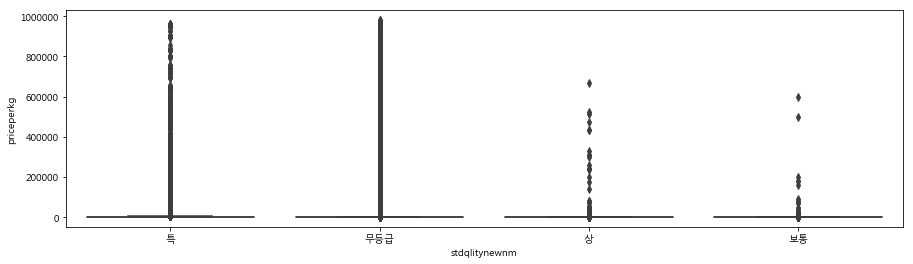

In [15]:
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='stdqlitynewnm', y='priceperkg', data=df[(df['stdqlitynewnm'] == '특') | (df['stdqlitynewnm'] == '무등급') | (df['stdqlitynewnm'] == '상') | (df['stdqlitynewnm'] == '보통')])

In [126]:
df['yyyy']   = df['delngde'].apply(lambda x: str(x)[0:4])
df['yyyymm'] = df['delngde'].apply(lambda x: str(x)[0:6])

In [132]:
df['yyyy'] = df['yyyy'].apply(lambda x: int(x))
df['yyyymm'] = df['yyyymm'].apply(lambda x: int(x))

In [127]:
# 정렬
df = df.sort_values(["yyyymm"], ascending=[True])

In [ ]:
stdspciesnewcode

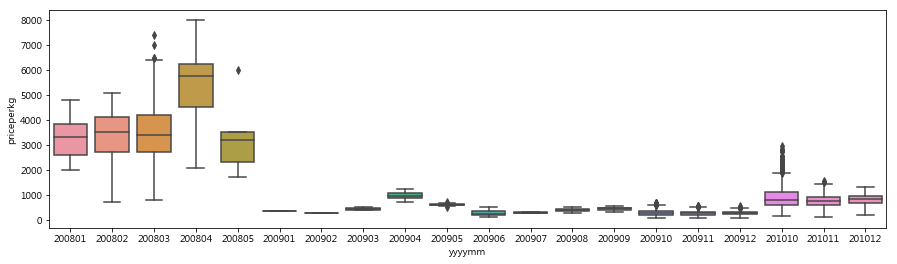

In [141]:
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='priceperkg'
                  , data=df[(df['stdqlitynewnm'] == '특')
                            & (df['yyyy'] <= 2010)
                            & (df['aucsecode'] == 1)
                            & (df['stdspciesnewcode'] == 100104)
                            & (df['whsalmrktnewnm'] == '가락동농수산물시장')
                           ])

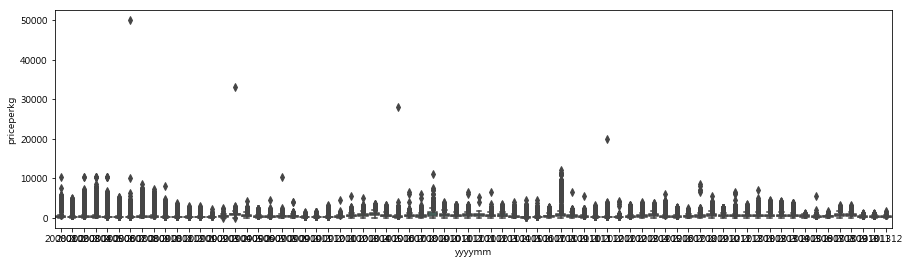

In [157]:
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='priceperkg'
                  , data=df[(df['stdqlitynewnm'] == '특')
                            & ((2014 > df['yyyy']) & (df['yyyy'] > 2007))
                            & (df['aucsecode'] == 1)
                            & ((df['stdspciesnewcode'] == 100101)
                                | (df['stdspciesnewcode'] == 100102)
                                | (df['stdspciesnewcode'] == 100103)
                                | (df['stdspciesnewcode'] == 100104)
                                | (df['stdspciesnewcode'] == 100105)
                                | (df['stdspciesnewcode'] == 100106))
                            & (df['priceperkg'] <= 50000)
                           ])

In [213]:
print(np.exp(4))
print(np.exp(9))

54.598150033144236
8103.083927575384


In [228]:
temp = df[
    (df['aucsecode'] == 1)
    & ((20120810 <= df['delngde']) & (df['delngde']<=20120817))
#     & (df['yyyymm']==201411)
    & ((500 < df['priceperkg']) & (df['priceperkg'] < 2000))
#     & (50 > df['priceperkg'])
    & (
        (df['stdspciesnewcode'] == 100101)
            | (df['stdspciesnewcode'] == 100102)
            | (df['stdspciesnewcode'] == 100103)
            | (df['stdspciesnewcode'] == 100104)
            | (df['stdspciesnewcode'] == 100105)
            | (df['stdspciesnewcode'] == 100106)
    )
    & (
        (df['whsalmrktcode'] == 110001)
            | (df['whsalmrktcode'] == 210001)
            | (df['whsalmrktcode'] == 220001)
#         | (df['whsalmrktcode'] == 230003)
      )
]

In [233]:
temp[['delngde','priceperkg']].groupby("delngde").mean().sort_values(by='delngde', ascending=True)

,priceperkg
delngde,
20120810,685.892857
20120811,681.500000
20120813,749.866667
20120814,721.222222
20120815,575.000000
20120816,666.666667
20120817,742.482143


In [229]:
pd.DataFrame(temp[['delngde','priceperkg']].groupby("delngde").mean().sort_values(by='delngde', ascending=False)['delngde'].apply(lambda x: format(int(x), ',')))

KeyError: 'delngde'

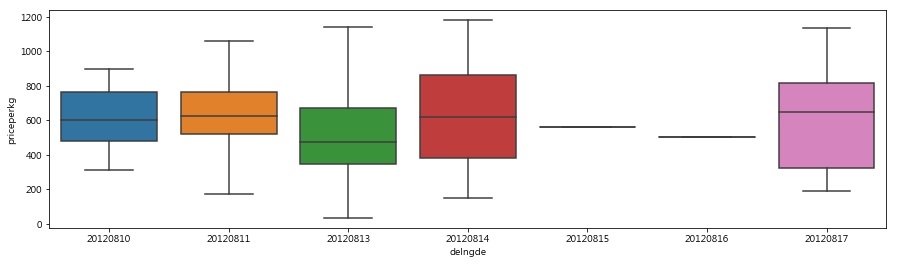

In [244]:
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='delngde', y='priceperkg'
    , data=df[
    (df['aucsecode'] == 1)
    & ((df['stdqlitynewcode'] == '11'))
    & ((20120810 <= df['delngde']) & (df['delngde']<=20120817))
#     & (df['yyyymm']==201411)
#     & ((100 < df['priceperkg']) & (df['priceperkg'] < 20000))
#     & (50 > df['priceperkg'])
    & (
        (df['stdspciesnewcode'] == 100101)
            | (df['stdspciesnewcode'] == 100102)
            | (df['stdspciesnewcode'] == 100103)
            | (df['stdspciesnewcode'] == 100104)
            | (df['stdspciesnewcode'] == 100105)
            | (df['stdspciesnewcode'] == 100106)
    )
    & (
        (df['whsalmrktcode'] == 110001)
            | (df['whsalmrktcode'] == 210001)
            | (df['whsalmrktcode'] == 220001)
#         | (df['whsalmrktcode'] == 230003)
      )
])

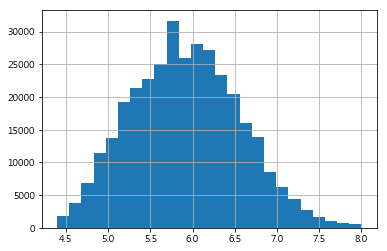

In [270]:
np.log(df[
    (df['aucsecode'] == 1)
#     & (df['yyyymm']>=200801)
#     & (df['yyyymm']==201411)
    & ((80 < df['priceperkg']) & (df['priceperkg'] < 3000))
    & (
        (df['stdspciesnewcode'] == 100101)
            | (df['stdspciesnewcode'] == 100102)
            | (df['stdspciesnewcode'] == 100103)
            | (df['stdspciesnewcode'] == 100104)
            | (df['stdspciesnewcode'] == 100105)
            | (df['stdspciesnewcode'] == 100106)
    )
    & (
        (df['whsalmrktcode'] == 110001)
            | (df['whsalmrktcode'] == 210001)
            | (df['whsalmrktcode'] == 220001)
#         | (df['whsalmrktcode'] == 230003)
      )
]['priceperkg']).hist(bins=25)

In [ ]:
df[
    (df['aucsecode'] == 1)
#     & (df['yyyymm']>=200801)
#     & (df['yyyymm']==201411)
    & ((80 < df['priceperkg']) & (df['priceperkg'] < 3000))
    & (
        (df['stdspciesnewcode'] == 100101)
            | (df['stdspciesnewcode'] == 100102)
            | (df['stdspciesnewcode'] == 100103)
            | (df['stdspciesnewcode'] == 100104)
            | (df['stdspciesnewcode'] == 100105)
            | (df['stdspciesnewcode'] == 100106)
    )
    & (
        (df['whsalmrktcode'] == 110001)
            | (df['whsalmrktcode'] == 210001)
            | (df['whsalmrktcode'] == 220001)
#         | (df['whsalmrktcode'] == 230003)
      )
]

### 데이터적 오류 검출
- 공공데이터를 활용해서 데이터 추출
- 모든 시장데이터를 활용했을 때 외상치가 너무 높게 나옴
- 일부 시장 데이터만 활용
- 외상치가 많이 줄어듦
- 공공데이터 활용시 모든 데이터가 클린하지 않으므로 data가공이 중요함을 발견

#### 앞에 데이터를 자르는 이유
- boxplot에서 외상치가 너무 많이 나옴
- 교육이 잘못되서 human error가 발생되었다고 판단
- 1년치 데이터 제거

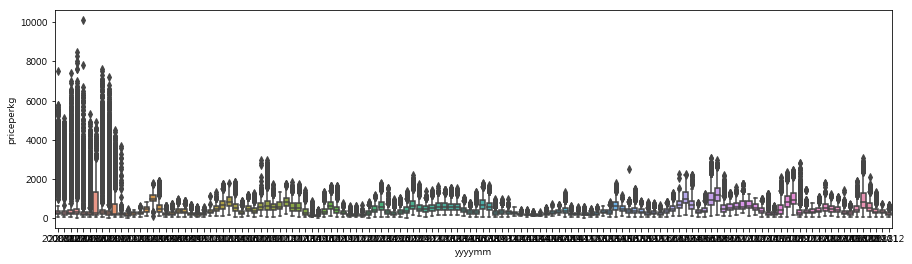

In [284]:
# 
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='priceperkg'
    , data=df[
    (df['aucsecode'] == 1)
    & (
        (df['stdspciesnewcode'] == 100101)
            | (df['stdspciesnewcode'] == 100102)
            | (df['stdspciesnewcode'] == 100103)
            | (df['stdspciesnewcode'] == 100104)
            | (df['stdspciesnewcode'] == 100105)
            | (df['stdspciesnewcode'] == 100106)
    )
    & (
        (df['whsalmrktcode'] == 110001)
            | (df['whsalmrktcode'] == 210001)
            | (df['whsalmrktcode'] == 220001)
      )
])

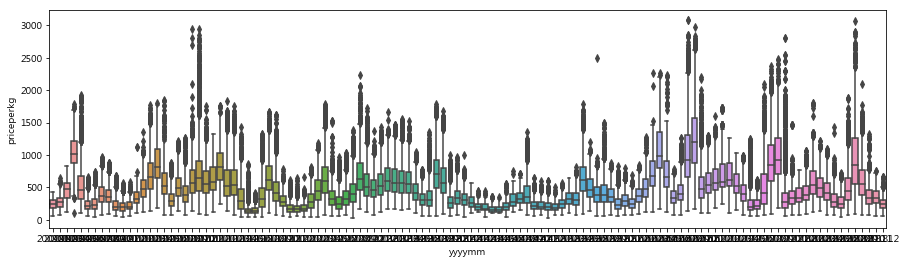

In [285]:
# 
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='priceperkg'
    , data=df[
    (df['aucsecode'] == 1)
    & (df['yyyymm'] >= 200901)
    & (
        (df['stdspciesnewcode'] == 100101)
            | (df['stdspciesnewcode'] == 100102)
            | (df['stdspciesnewcode'] == 100103)
            | (df['stdspciesnewcode'] == 100104)
            | (df['stdspciesnewcode'] == 100105)
            | (df['stdspciesnewcode'] == 100106)
    )
    & (
        (df['whsalmrktcode'] == 110001)
            | (df['whsalmrktcode'] == 210001)
            | (df['whsalmrktcode'] == 220001)
      )
])

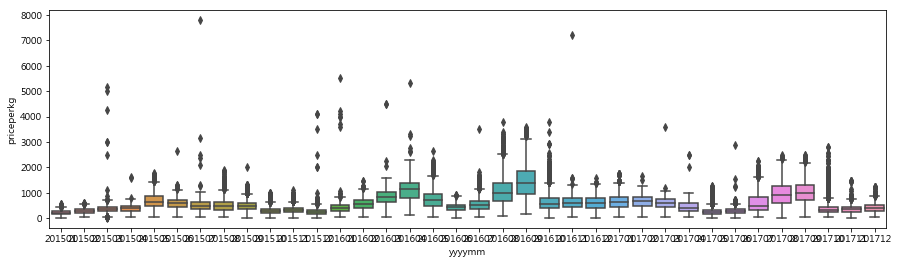

In [156]:
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='priceperkg'
                  , data=df[(df['stdqlitynewnm'] == '특')
                            & ((2018 > df['yyyy']) & (df['yyyy'] > 2014))
                            & (df['aucsecode'] == 1)
                            & ((df['stdspciesnewcode'] == 100101)
                                | (df['stdspciesnewcode'] == 100102)
                                | (df['stdspciesnewcode'] == 100103)
                                | (df['stdspciesnewcode'] == 100104)
                                | (df['stdspciesnewcode'] == 100105)
                                | (df['stdspciesnewcode'] == 100106))
                            & (df['priceperkg'] <= 50000)
                           ])

In [ ]:
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='kg', data=df[(df['stdqlitynewnm'] == '특')])

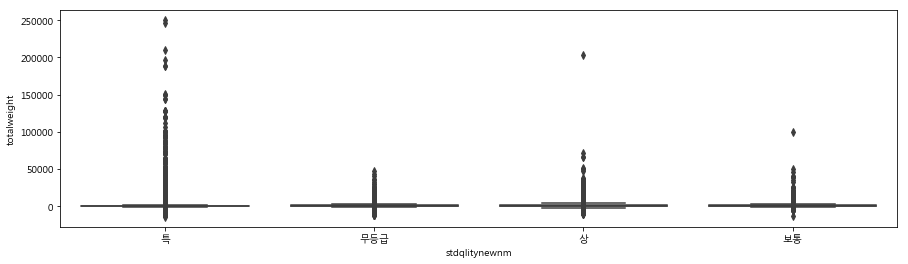

In [16]:
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='stdqlitynewnm', y='totalweight', data=df[(df['stdqlitynewnm'] == '특') | (df['stdqlitynewnm'] == '무등급') | (df['stdqlitynewnm'] == '상') | (df['stdqlitynewnm'] == '보통')])

In [17]:
df[((df['stdqlitynewnm'] == '특') | (df['stdqlitynewnm'] == '무등급') | (df['stdqlitynewnm'] == '상') | (df['stdqlitynewnm'] == '보통')) & (df['totalweight'] <= 0)].shape

(8976, 47)

(9295, 47)


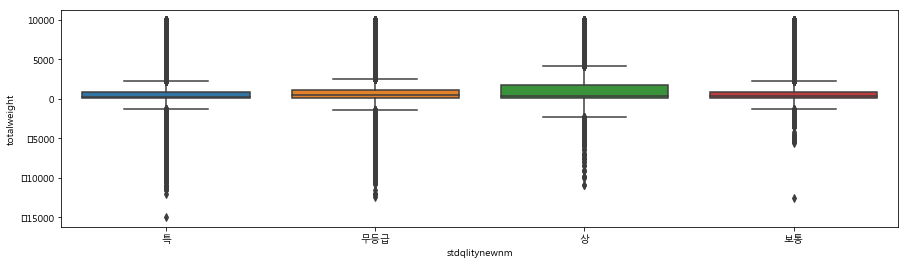

In [18]:
# 10ton 밑으로 재조회
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='stdqlitynewnm', y='totalweight', data=df[((df['stdqlitynewnm'] == '특') | (df['stdqlitynewnm'] == '무등급') | (df['stdqlitynewnm'] == '상') | (df['stdqlitynewnm'] == '보통')) & (df['totalweight'] <= 10000)])
print(df[((df['stdqlitynewnm'] == '특') | (df['stdqlitynewnm'] == '무등급') | (df['stdqlitynewnm'] == '상') | (df['stdqlitynewnm'] == '보통')) & (df['totalweight'] >= 10000)].shape)

#### 그룹별 중위수

In [19]:
df[(df['stdqlitynewnm'] != '특') & (df['stdqlitynewnm'] != '무등급') & (df['stdqlitynewnm'] != '상') & (df['stdqlitynewnm'] != '보통')][['stdqlitynewnm','priceperkg']].groupby("stdqlitynewnm").median()

,priceperkg
stdqlitynewnm,
4등,350.000000
5등,500.000000
6등,445.833333
7등,316.250000
8등,750.000000
등외,330.000000
무농약,1250.000000
유기농산물,4310.000000
저농약,174.166667


#### 그룹별 평균

In [20]:
df[(df['stdqlitynewnm'] != '특') & (df['stdqlitynewnm'] != '무등급') & (df['stdqlitynewnm'] != '상') & (df['stdqlitynewnm'] != '보통')][['stdqlitynewnm','priceperkg']].groupby("stdqlitynewnm").mean()

,priceperkg
stdqlitynewnm,
4등,423.395744
5등,584.405751
6등,573.339886
7등,550.856481
8등,830.462562
등외,522.321368
무농약,2386.228860
유기농산물,3904.106557
저농약,211.573466


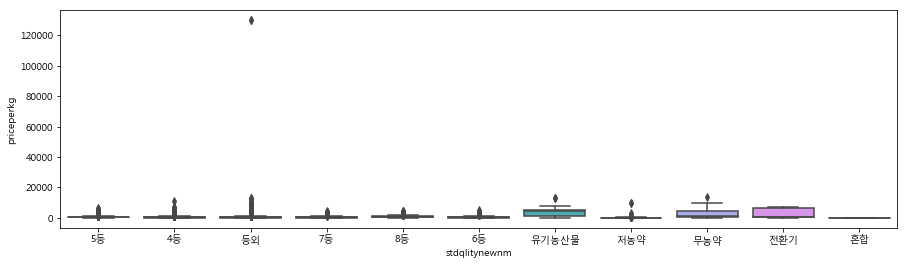

In [21]:
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='stdqlitynewnm', y='priceperkg', data=df[(df['stdqlitynewnm'] != '특') & (df['stdqlitynewnm'] != '무등급') & (df['stdqlitynewnm'] != '상') & (df['stdqlitynewnm'] != '보통')])

### 품종코드 stdspciesnewcode / stdspciesnewnm
- 구품종코드 stdspciescode stdspciesnm
- 품목코드 stdprdlstnewcode / stdprdlstnewnm
- 구품목코드 stdprdlstnm / stdprdlstcode 

In [22]:
df[['stdspciesnewcode','stdspciesnewnm']].drop_duplicates()

,stdspciesnewcode,stdspciesnewnm
89632,100199,기타
59862,100108,쌈(알배기)배추
335396,100103,김장(가을)배추
147112,100101,봄배추
221797,100105,고냉지배추
224097,100106,저장배추
3865,100104,월동배추
87998,100109,우거지
38848,100110,배추뿌리
13,100102,여름배추


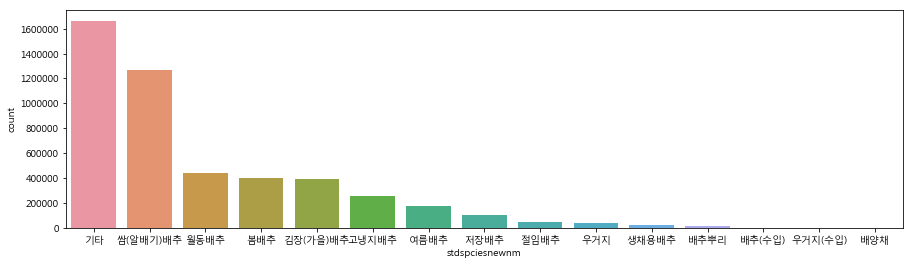

In [23]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(df['stdspciesnewnm'],order = df['stdspciesnewnm'].value_counts().index)

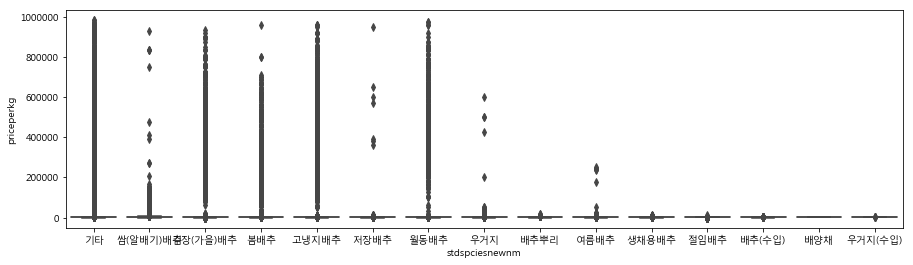

In [24]:
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='stdspciesnewnm', y='priceperkg', data=df)

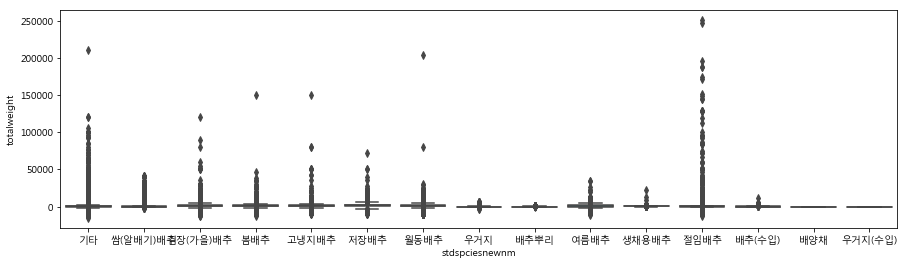

In [25]:
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='stdspciesnewnm', y='totalweight', data=df)

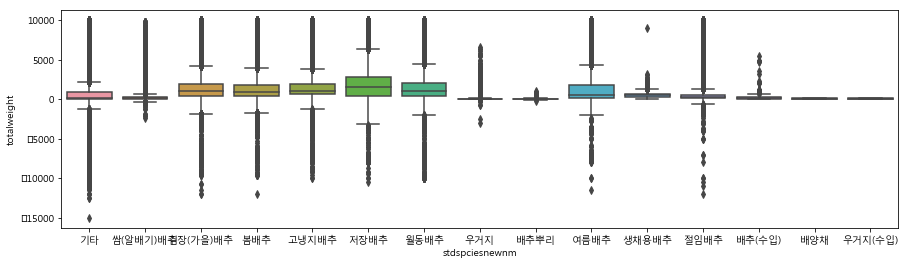

In [26]:
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='stdspciesnewnm', y='totalweight', data=df[(df['totalweight'] <= 10000)])

#### 년도별 분포 시각화
- 참고자료 : 1_1. 배추무게분포.ipynb

### 산지코드 stdmtcnewcode / stdmtcnewnm
- 구산지코드 cprmtccode / cprmtcnm

In [27]:
# 결측값이 너무 많으므로 처리방안 고려 필요
df[df['stdmtcnewnm'] == ''].shape

(0, 47)

In [28]:
# df[['stdmtcnewcode','stdmtcnewnm']].drop_duplicates()
df[['stdmtcnewnm']].drop_duplicates()

,stdmtcnewnm
89632,경기도 구리시
59862,인천광역시 계양구
74075,서울특별시 강남구
89697,경기도 남양주시
176305,강원도 평창군
176307,강원도 원주시
176309,서울특별시 강동구
179851,강원도 횡성군
179853,경기도 여주시
179857,경기도 부천시


In [95]:
temp = df[['stdmtcnewnm','totalweight']].groupby("stdmtcnewnm").sum().sort_values(by='totalweight', ascending=False)

In [99]:
temp[0:5]

,totalweight
stdmtcnewnm,
전라남도 해남군,8.398602e+08
강원도 평창군,3.507563e+08
강원도 태백시,2.524317e+08
강원도 강릉시,2.085546e+08
강원도 정선군,1.411232e+08


In [97]:
temp.sort_values['totalweight']

TypeError: 'method' object is not subscriptable

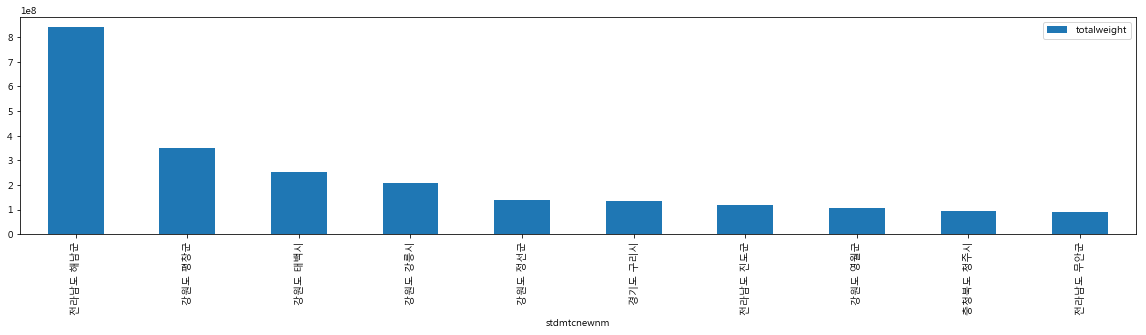

In [100]:
f, ax = plt.subplots(figsize=(20, 4))
df[['stdmtcnewnm','totalweight']].groupby("stdmtcnewnm").sum().sort_values(by='totalweight', ascending=False)[0:10].plot.bar(ax=ax)

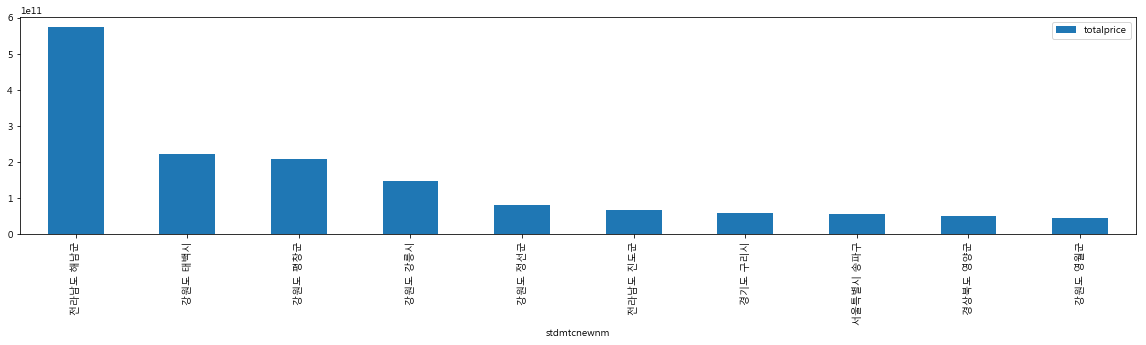

In [101]:
f, ax = plt.subplots(figsize=(20, 4))
df[['stdmtcnewnm','totalprice']].groupby("stdmtcnewnm").sum().sort_values(by='totalprice', ascending=False)[0:10].plot.bar(ax=ax)

### 단위코드 stdunitnewcode / stdunitnewnm

In [31]:
df[['stdunitnewcode','stdunitnewnm']].drop_duplicates()

,stdunitnewcode,stdunitnewnm
89632,11,g
0,12,kg
562,13,ton


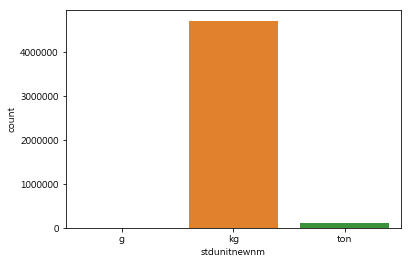

In [32]:
sns.countplot(df['stdunitnewnm'])

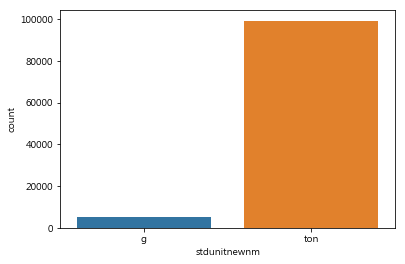

In [33]:
sns.countplot(df[(df['stdunitnewcode'] != 12)]['stdunitnewnm'])

### 시장코드 whsalmrktnewcode / whsalmrktnewnm
- 구시장코드 whsalmrktcode / whsalmrktnm 
- 가락시장 코드 1005601(신) 110001(구)

In [160]:
df[['whsalmrktcode','whsalmrktnewcode','whsalmrktnewnm']].drop_duplicates()

,whsalmrktcode,whsalmrktnewcode,whsalmrktnewnm
0,360101,2058701,목포농산물도매시장
17191,380303,1051101,창원내서농산물도매시장
16912,310901,1015201,안산농수산물도매시장
16543,210009,1048001,부산반여농산물도매시장
17061,350101,1055001,전주농수산물도매시장
17059,340101,1031201,천안농산물도매시장
16994,330101,1028701,청주농수산물도매시장
17012,330201,1027301,충주농수산물도매시장
17079,350402,1056101,정읍농산물도매시장
17077,350301,1054501,익산농수산물도매시장


In [ ]:
whsalmrktcode
110001
220001
110008
311201
230003

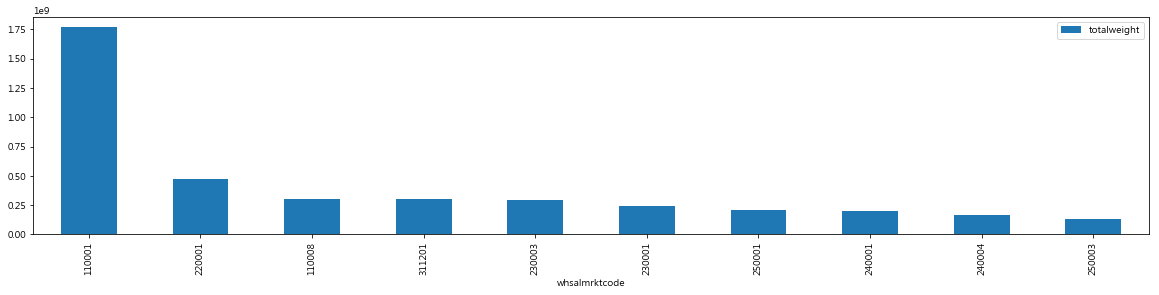

In [161]:
f, ax = plt.subplots(figsize=(20, 4))
df[['whsalmrktcode','totalweight']].groupby("whsalmrktcode").sum().sort_values(by='totalweight', ascending=False)[0:10].plot.bar(ax=ax)

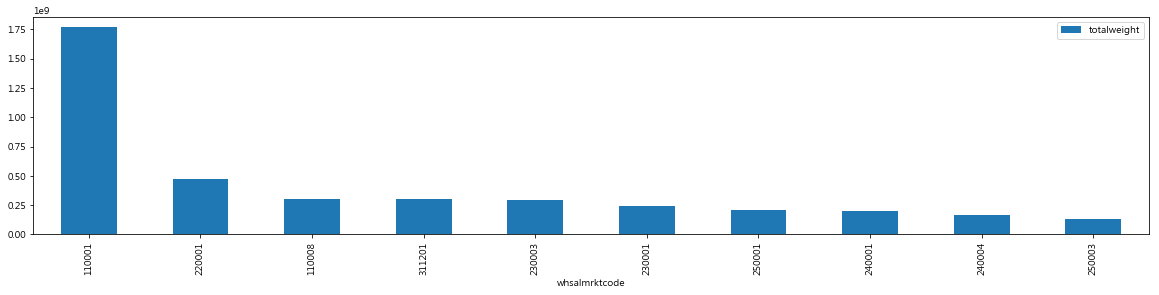

In [162]:
f, ax = plt.subplots(figsize=(20, 4))
df[['whsalmrktcode','totalweight']].groupby("whsalmrktcode").sum().sort_values(by='totalweight', ascending=False)[0:10].plot.bar(ax=ax)

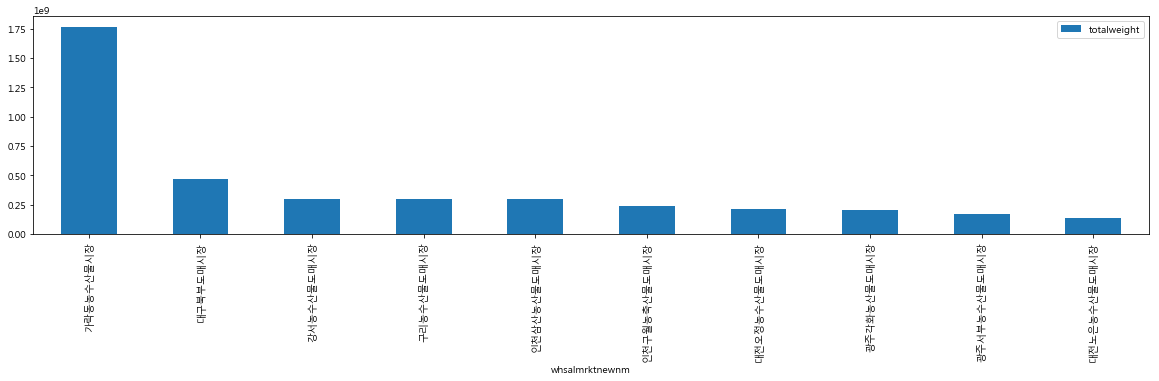

In [102]:
f, ax = plt.subplots(figsize=(20, 4))
df[['whsalmrktnewnm','totalweight']].groupby("whsalmrktnewnm").sum().sort_values(by='totalweight', ascending=False)[0:10].plot.bar(ax=ax)

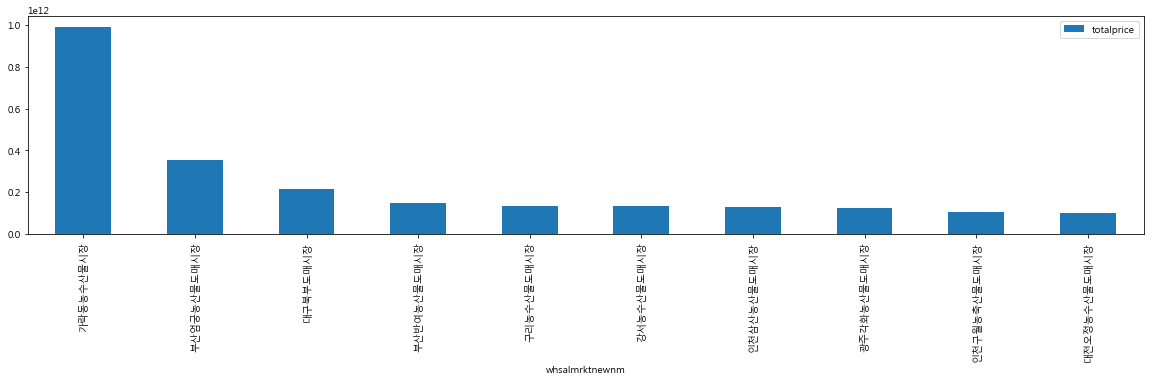

In [103]:
f, ax = plt.subplots(figsize=(20, 4))
df[['whsalmrktnewnm','totalprice']].groupby("whsalmrktnewnm").sum().sort_values(by='totalprice', ascending=False)[0:10].plot.bar(ax=ax)